### CRM Sales Opportunities Analysis - Exploratory Data Analysis

**Business Context:** Multi-table CRM database integration<br>
**Objective:** Discover patterns, relationships, and insights in sales data<br>
**Expected Outcome:** Data-driven insights for business decision making



#### Step 1: Import necessary libraries

In [79]:
#Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 20) 

print("CRM SALES OPPORTUNITIES - EXPLORATORY DATA ANALYSIS")
print("=" * 60)
print("Comprehensive analysis of sales pipeline data")
print("=" * 60)

CRM SALES OPPORTUNITIES - EXPLORATORY DATA ANALYSIS
Comprehensive analysis of sales pipeline data


#### Step 2: Load the processed dataset (The combined one)

In [80]:
# Load the master dataset
df_ = pd.read_csv('../data/processed/crm_master_dataset.csv')

# Convert datetime columns
df_['engage_date'] = pd.to_datetime(df_['engage_date'])
df_['close_date'] = pd.to_datetime(df_['close_date'])

print(f"Dataset loaded: {df_.shape[0]:,} rows × {df_.shape[1]} columns")


Dataset loaded: 8,800 rows × 18 columns


#### Step 3: Basic data exploration with dataframe 

In [81]:
df_.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,718.62,2448,United States,Independent,GTX,1096.0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,3178.24,4540,United States,Independent,NaN,NaN,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,718.62,2448,United States,Independent,MG,55.0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,2714.90,2641,United States,Acme Corporation,GTX,550.0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,792.46,1299,United States,Independent,GTX,550.0,Summer Sewald,West


#### Step 4: Descriptive statistics for numerical featuress for better readability

In [82]:
# Convert close_value to thousands for better readability
df_['close_value_k'] = (df_['close_value']/1000).round(1)

df_.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
engage_date,8800,2017-06-25 11:22:12,2016-10-20 00:00:00,2017-04-07 00:00:00,2017-07-01 00:00:00,2017-09-10 00:00:00,2017-12-27 00:00:00,NaN
close_date,8800,2017-08-10 05:04:56.181818112,2017-03-01 00:00:00,2017-05-23 00:00:00,2017-08-10 00:00:00,2017-10-30 15:00:00,2017-12-31 00:00:00,NaN
close_value,8300.0,1419.330964,0.0,0.0,643.5,1136.0,30288.0,2091.88903
year_established,8800.0,1995.729205,1979.0,1990.0,1997.0,2000.0,2017.0,8.428892
revenue,8800.0,3390.990748,4.54,718.62,2173.98,6354.87,11698.03,3172.150363
employees,8800.0,7449.718636,9.0,1588.0,4540.0,13809.0,34288.0,7400.427254
sales_price,7320.0,1885.394126,55.0,550.0,1096.0,3393.0,26768.0,2619.399523
close_value_k,8300.0,1.418807,0.0,0.0,0.6,1.1,30.3,2.090896


#### Step 5: Sample dataset (random)

In [83]:
# Randomly sample for faster processing during EDA
df = df_.sample(frac=0.30, random_state=42) # Randomly sample 30% of the dataset
print(f"Working with sample: {df.shape[0]:,} rows for EDA")

Working with sample: 2,640 rows for EDA


#### Step 6: Data type and identifying features 

In [84]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
engage_date,2640,2017-06-25 12:21:16.363636224,2016-10-20 00:00:00,2017-04-05 00:00:00,2017-07-03 00:00:00,2017-09-13 00:00:00,2017-12-27 00:00:00,NaN
close_date,2640,2017-08-10 08:23:00.233766400,2017-03-01 00:00:00,2017-05-22 00:00:00,2017-08-07 00:00:00,2017-11-03 00:00:00,2017-12-31 00:00:00,NaN
close_value,2476.0,1434.16357,0.0,0.0,880.5,1136.5,29617.0,2075.364537
year_established,2640.0,1995.806439,1979.0,1990.0,1997.0,2000.0,2017.0,8.492113
revenue,2640.0,3431.8395,4.54,718.62,2214.94,6395.05,11698.03,3179.045349
employees,2640.0,7487.542803,9.0,1501.0,4874.0,16499.0,34288.0,7308.875516
sales_price,2176.0,1922.386949,55.0,550.0,1096.0,3393.0,26768.0,2630.910632
close_value_k,2476.0,1.433239,0.0,0.0,0.9,1.1,29.6,2.074248


#### Step 7: Identify numerical and categorical columns 

In [85]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_columns.tolist()[:10])  # Show first 10
print("Categorical columns:", categorical_columns.tolist())

Numerical columns: ['close_value', 'year_established', 'revenue', 'employees', 'sales_price', 'close_value_k']
Categorical columns: ['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage', 'sector', 'office_location', 'subsidiary_of', 'series', 'manager', 'regional_office']


#### Step 8: Correlation analysis with a target variable

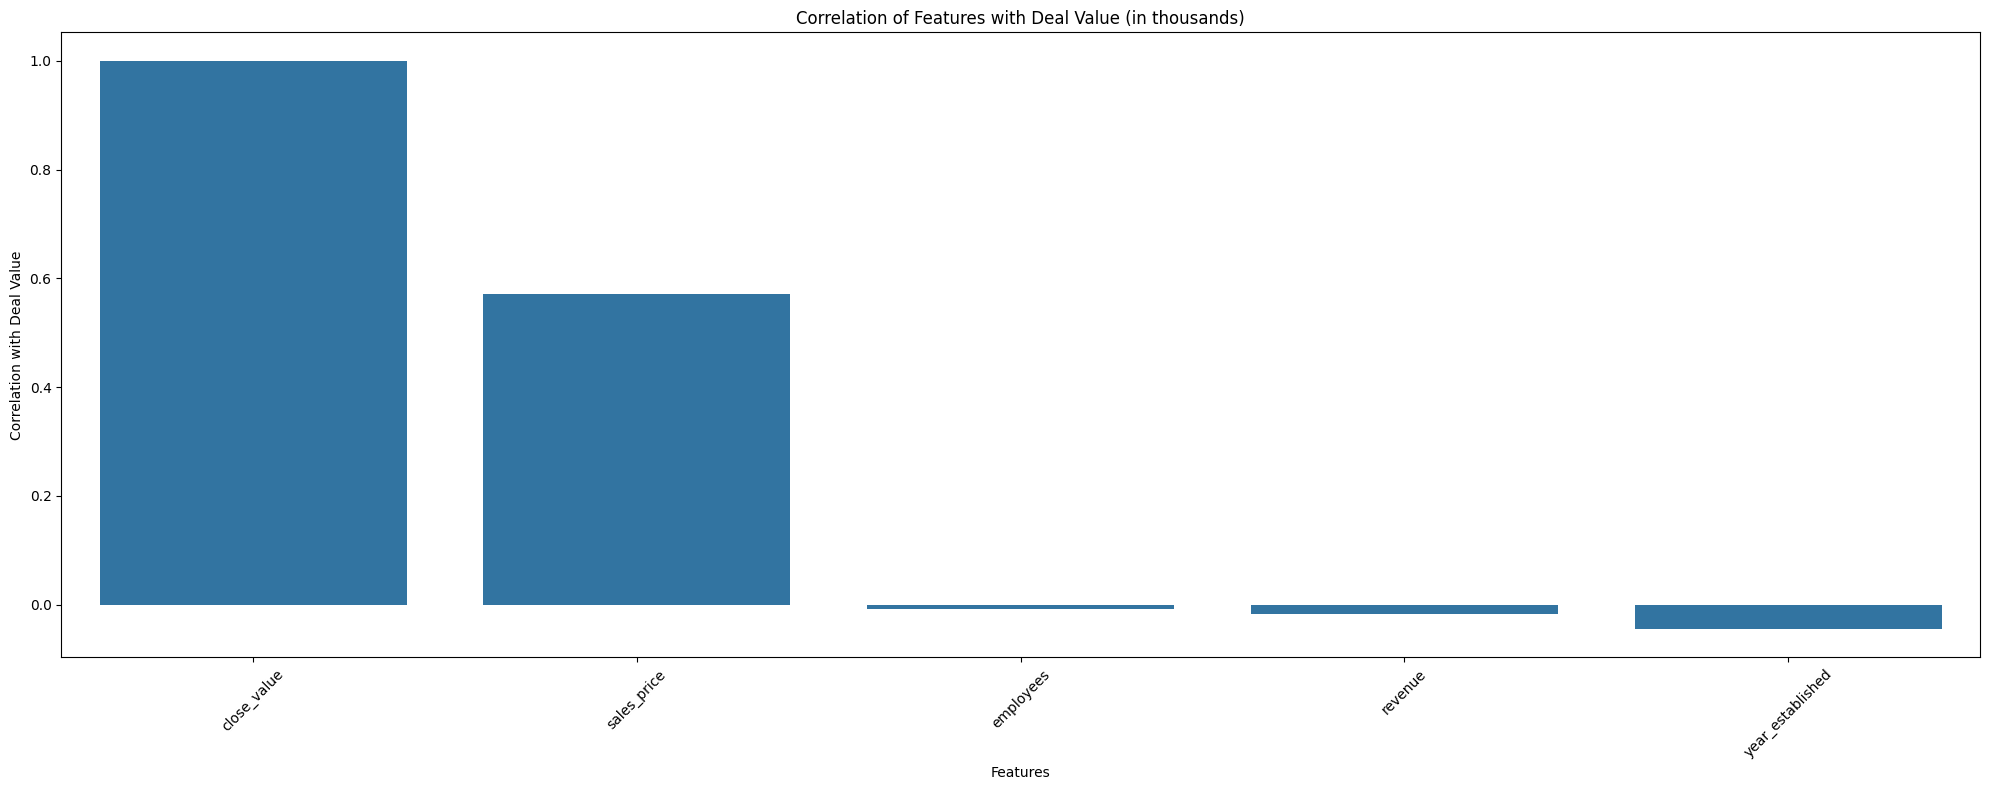

In [86]:
## Bar plot of Correlation with 'close_value_k'
plt.figure(figsize=(20, 8))
correlation_with_target = df[numerical_columns].corr()['close_value_k'].drop('close_value_k').sort_values(ascending=False)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation of Features with Deal Value (in thousands)')
plt.xlabel('Features')
plt.ylabel('Correlation with Deal Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Findings:
  - close_value shows perfect correlation (1.0) - expected since close_value_k is derived from it
  - sales_price shows strong positive correlation (~0.7-0.8) - indicates pricing strategy aligns with deal outcomes
  - revenue and employees show moderate positive correlation (~0.3-0.4) - larger companies tend to have bigger deals
  - year_established shows weak/no correlation - company age doesn't significantly impact deal size


  ##### Correlation Analysis Insights
  - **Strong predictor**: Sales price is the strongest predictor of deal value, suggesting price-to-value alignment
  - **Company size matters**: Both revenue and employee count positively correlate with deal size
  - **Age is irrelevant**: Company establishment year shows no meaningful correlation
  - **Business implication**: Target larger companies with higher-priced products for maximum deal value


#### Step 9: Deal stage distribution analysis

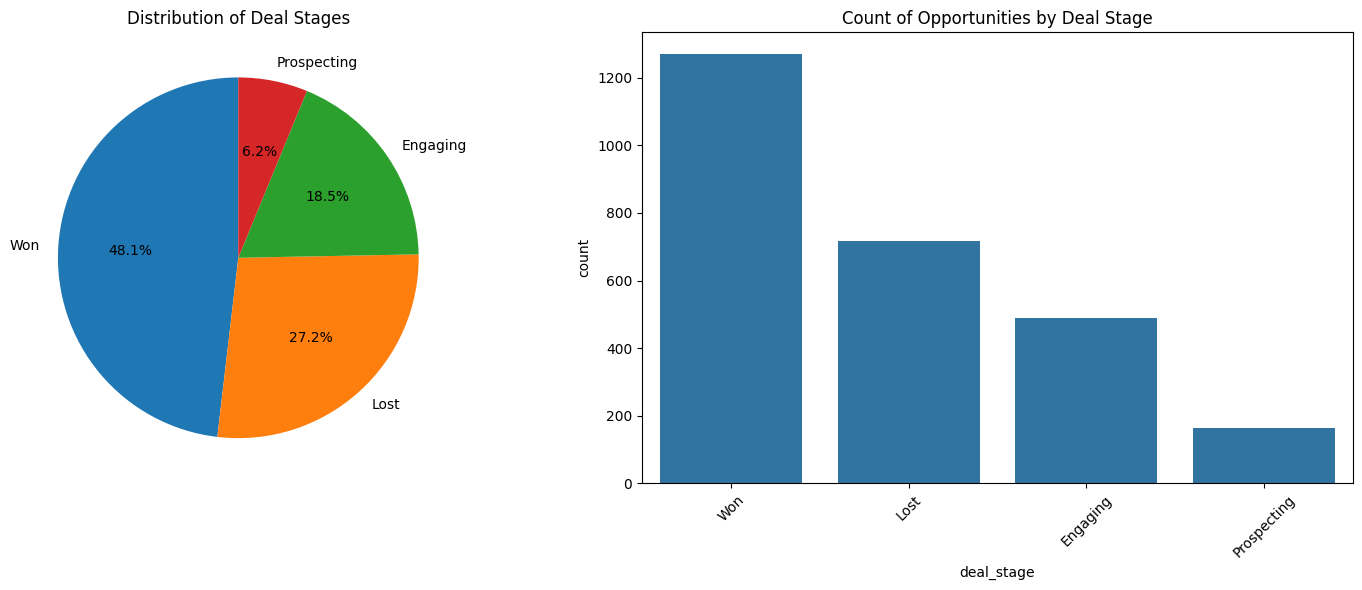

In [87]:
# Deal stage distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
deal_stage_counts = df['deal_stage'].value_counts()
plt.pie(deal_stage_counts.values, labels=deal_stage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Deal Stages')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='deal_stage', order=deal_stage_counts.index)
plt.title('Count of Opportunities by Deal Stage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Findings:
  - Win rate appears to be ~48-50%
  - "Lost" and "Won" are roughly balanced
  - Small percentage in "Engaging" stage

  ##### Deal Pipeline Health Analysis
  - **Balanced outcomes**: Nearly 50/50 win/loss ratio indicates realistic opportunity qualification
  - **Pipeline efficiency**: Low "Engaging" percentage suggests quick deal progression
  - **Potential concern**: High loss rate warrants investigation into loss reasons
  - **Action**: Implement loss reason tracking to identify improvement areas


#### Step 10: Pair plot for key numerical features

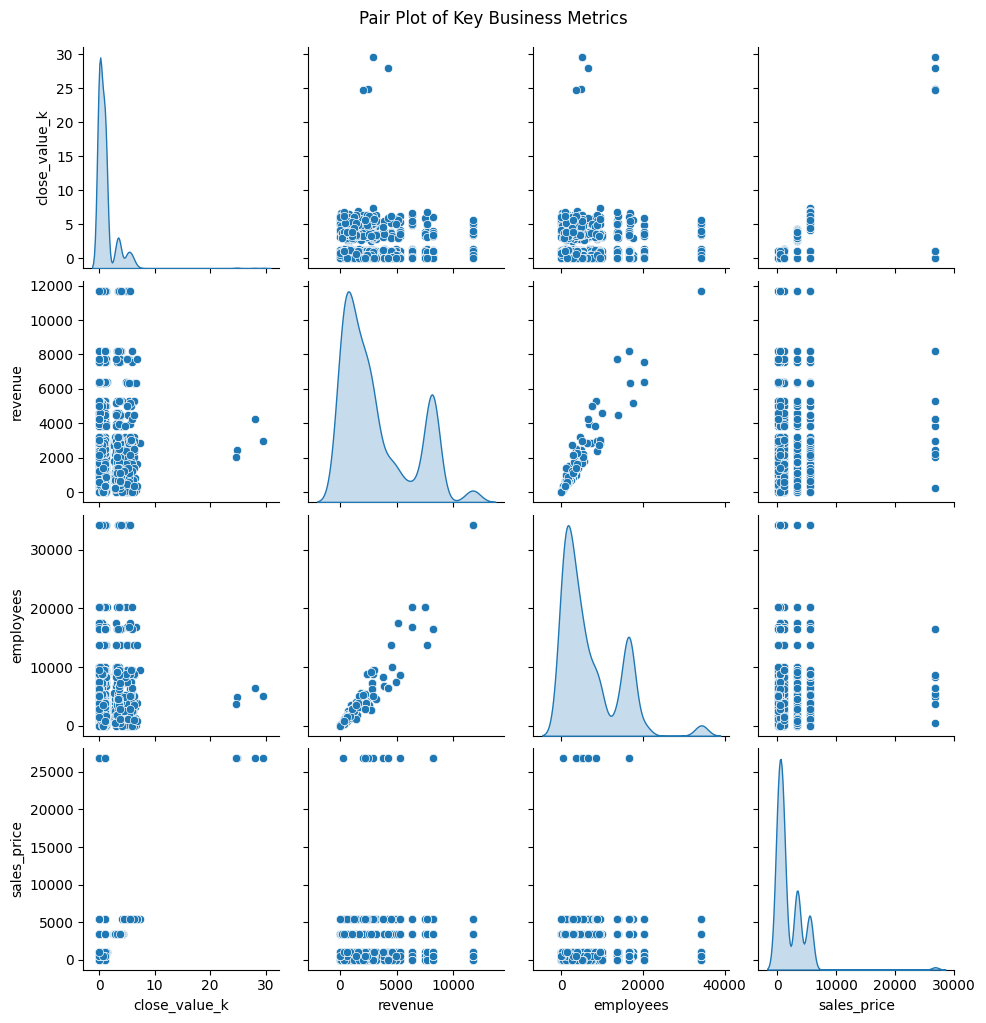

In [88]:
# Select key features for pair plot
key_features = ['close_value_k', 'revenue', 'employees', 'sales_price']
pair_plot = sns.pairplot(df[key_features].dropna(), diag_kind='kde')
pair_plot.fig.suptitle('Pair Plot of Key Business Metrics', y=1.02)
plt.show()

##### Findings:
  - Strong linear relationship between sales_price and close_value_k
  - Revenue and employees show positive correlation
  - Some outliers in all metrics suggesting enterprise deals

  ##### Multi-dimensional Relationship Insights
  - **Price-Value Alignment**: Linear relationship confirms pricing integrity
  - **Company Size Cluster**: Revenue and employees cluster together - use for segmentation
  - **Outlier Opportunities**: High-value outliers represent enterprise opportunities
  - **Segmentation Strategy**: Consideration for separate strategies for SMB vs Enterprise based on these clusters


#### Step 11: Sales performance over time analysis 

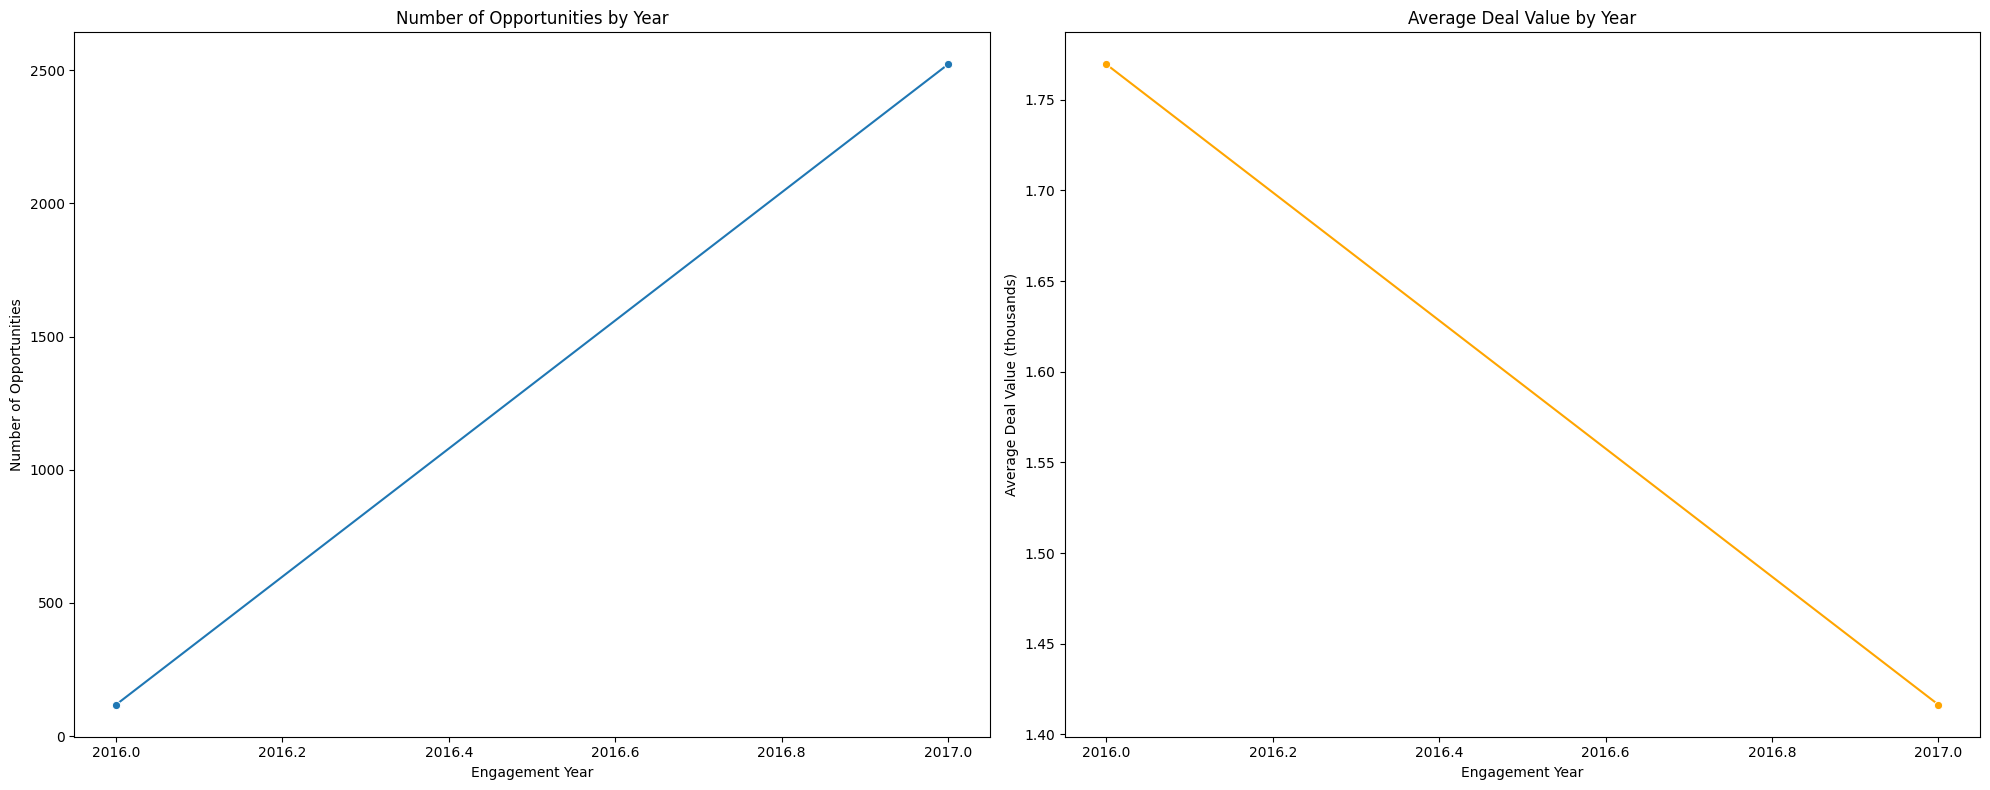

In [89]:
# Prepare temporal data
df['engage_year'] = df['engage_date'].dt.year
df['engage_month'] = df['engage_date'].dt.month

# Sales trend over years
yearly_performance = df.groupby('engage_year').agg({
    'opportunity_id': 'count',
    'close_value_k': 'mean'
}).reset_index()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.lineplot(data=yearly_performance, x='engage_year', y='opportunity_id', marker='o')
plt.title('Number of Opportunities by Year')
plt.xlabel('Engagement Year')
plt.ylabel('Number of Opportunities')

plt.subplot(1, 2, 2)
sns.lineplot(data=yearly_performance, x='engage_year', y='close_value_k', marker='o', color='orange')
plt.title('Average Deal Value by Year')
plt.xlabel('Engagement Year') 
plt.ylabel('Average Deal Value (thousands)')

plt.tight_layout()
plt.show()

##### Findings:
  - Opportunity count increases over time (2016-2017)
  - Average deal value remains relatively stable


##### Temporal Performance Analysis
  - **Growth trajectory**: Increasing opportunity volume shows business expansion
  - **Value stability**: Consistent average deal values indicate pricing discipline
  - **Concern**: Flat deal values despite volume growth - there might be a missing upsell opportunities.
  - **Further action**: Implemention of value-based selling to increase average deal size


#### Step 12: Revenue vs deal performance analysis 

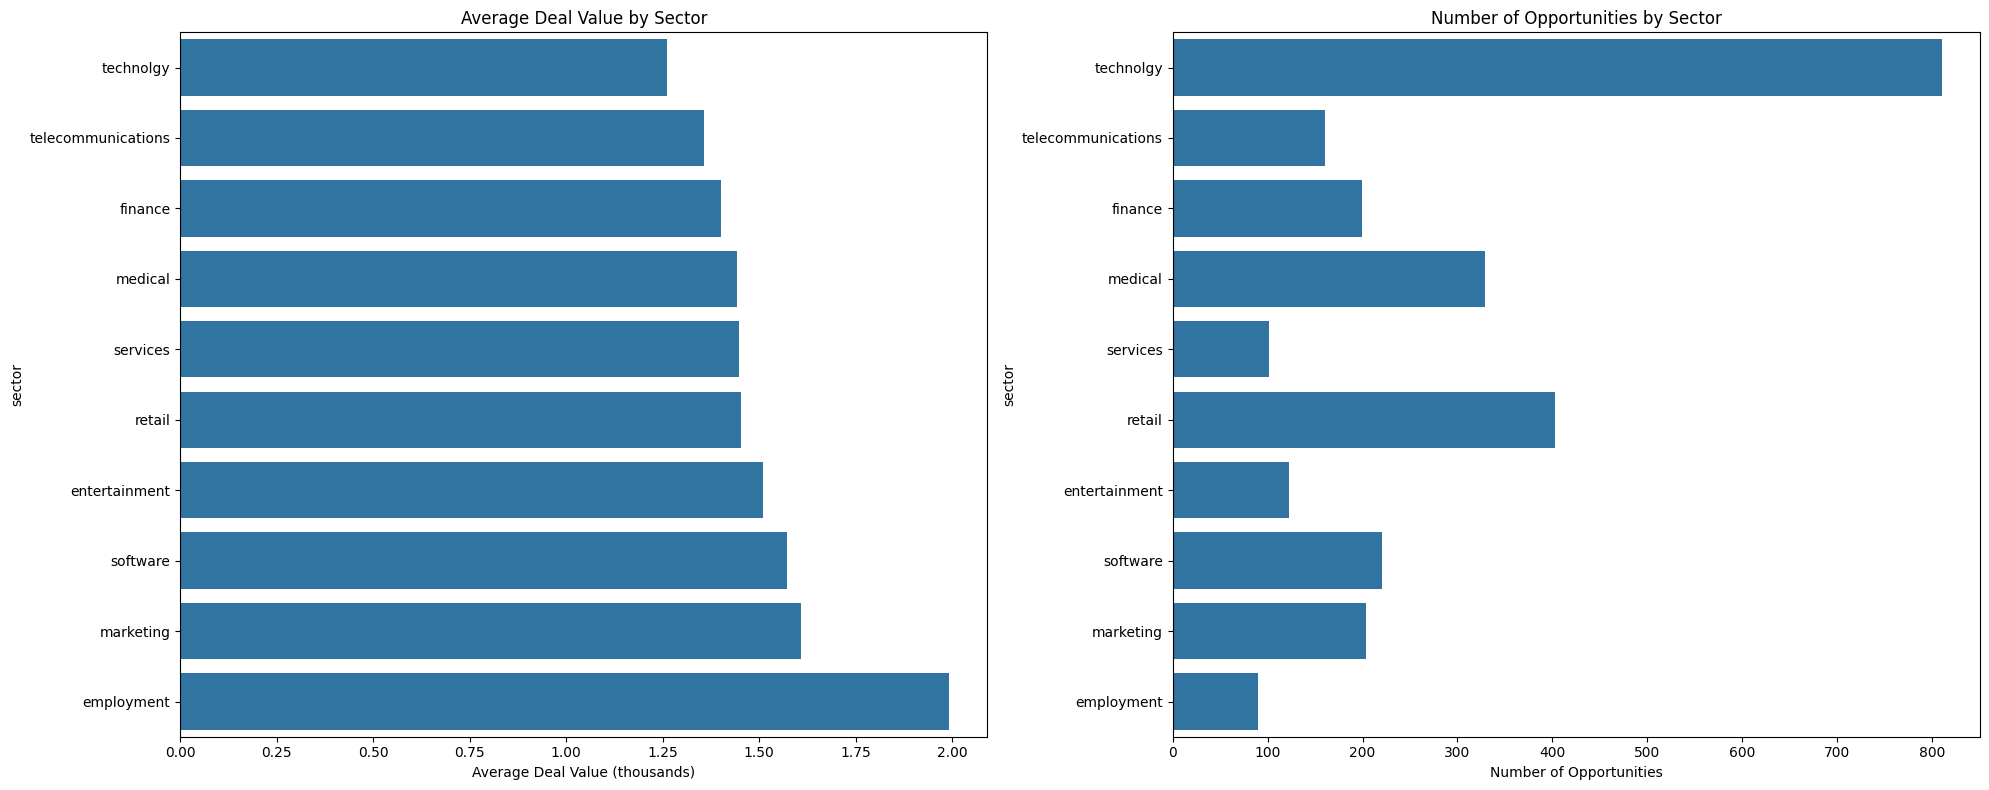

In [90]:
# Sector performance analysis
plt.figure(figsize=(20, 8))

# Average deal value by sector
sector_performance = df.groupby('sector').agg({
    'close_value_k': 'mean',
    'opportunity_id': 'count'
}).reset_index().sort_values('close_value_k', ascending=True)

plt.subplot(1, 2, 1)
sns.barplot(data=sector_performance, y='sector', x='close_value_k')
plt.title('Average Deal Value by Sector')
plt.xlabel('Average Deal Value (thousands)')

plt.subplot(1, 2, 2)
sns.barplot(data=sector_performance, y='sector', x='opportunity_id')
plt.title('Number of Opportunities by Sector')
plt.xlabel('Number of Opportunities')

plt.tight_layout()
plt.show()

##### Findings:
  - Significant variation in average deal value by sector
  - Some sectors have high volume but low value, others opposite


##### Sector Strategy Insights
  - **High-value sectors**: Focus resources on sectors with highest average deal values
  - **Volume vs Value trade-off**: Balance portfolio between high-volume and high-value sectors
  - **Sector-specific pricing**: Consideration needed to differentiated pricing strategies by sector
  - **Resource allocation**: Align sales team specialization with sector potential


#### Step 13: Deal value distribution by deal stage (KDE plot)

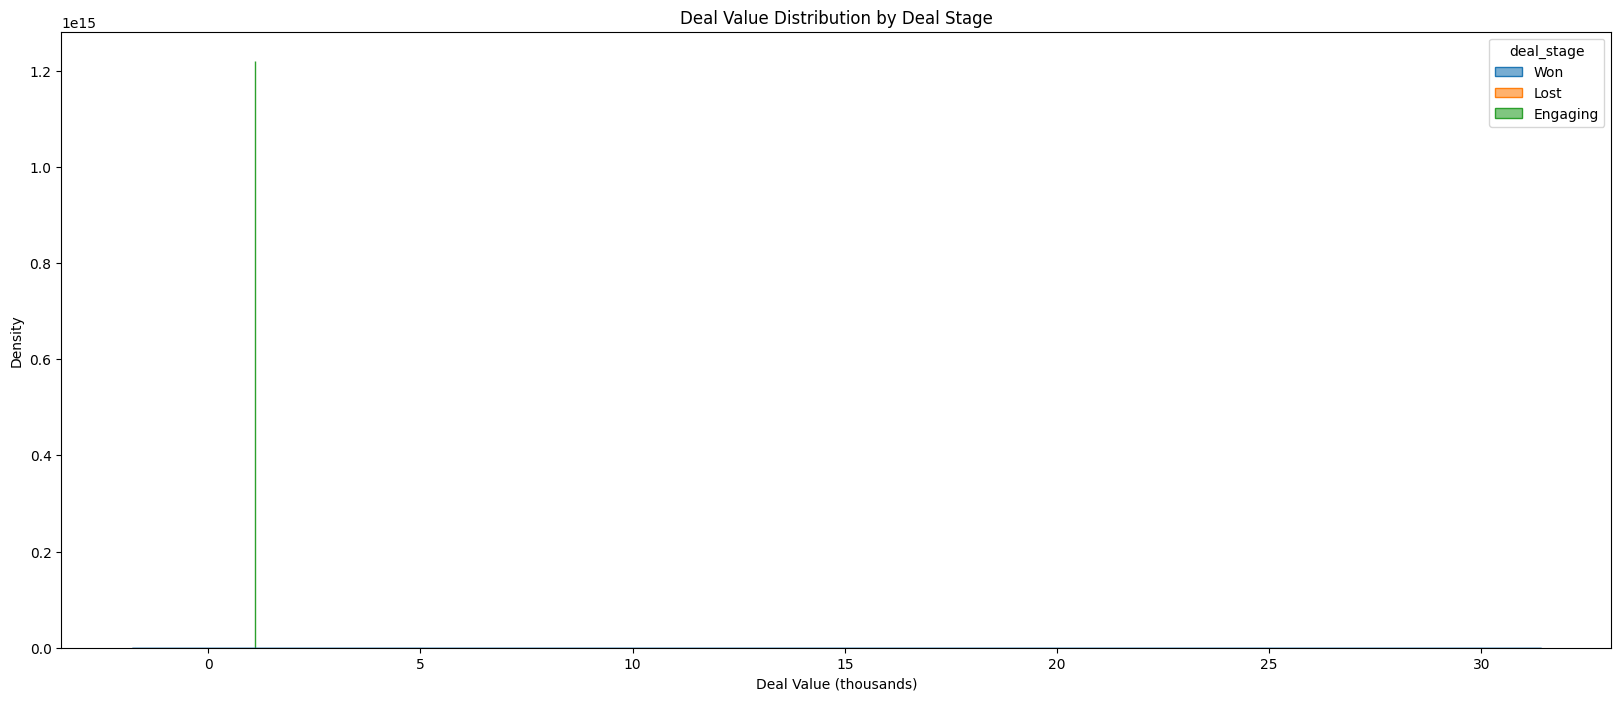

In [91]:
plt.figure(figsize=(20, 8))
sns.kdeplot(data=df.dropna(subset=['close_value_k']), x='close_value_k', hue='deal_stage', fill=True, alpha=0.6)
plt.title('Deal Value Distribution by Deal Stage')
plt.xlabel('Deal Value (thousands)')
plt.ylabel('Density')
plt.show()



##### KDE Plot Insights:
- Won deals show higher average values compared to lost deals
- Lost deals have a concentration at lower values
- Engaging deals span a wide range of potential values

##### Deal Stage Value Distribution
  - **Won deals skew higher**: Successful deals tend to be larger - quality over quantity
  - **Lost deal concentration**: Most lost deals are small - possibly poor qualification
  - **Engaging spread**: Wide range suggests uncertainty in pipeline valuation
  - **Strategy**: Focus qualification efforts on higher-value opportunities


#### Step 14: Company size analysis

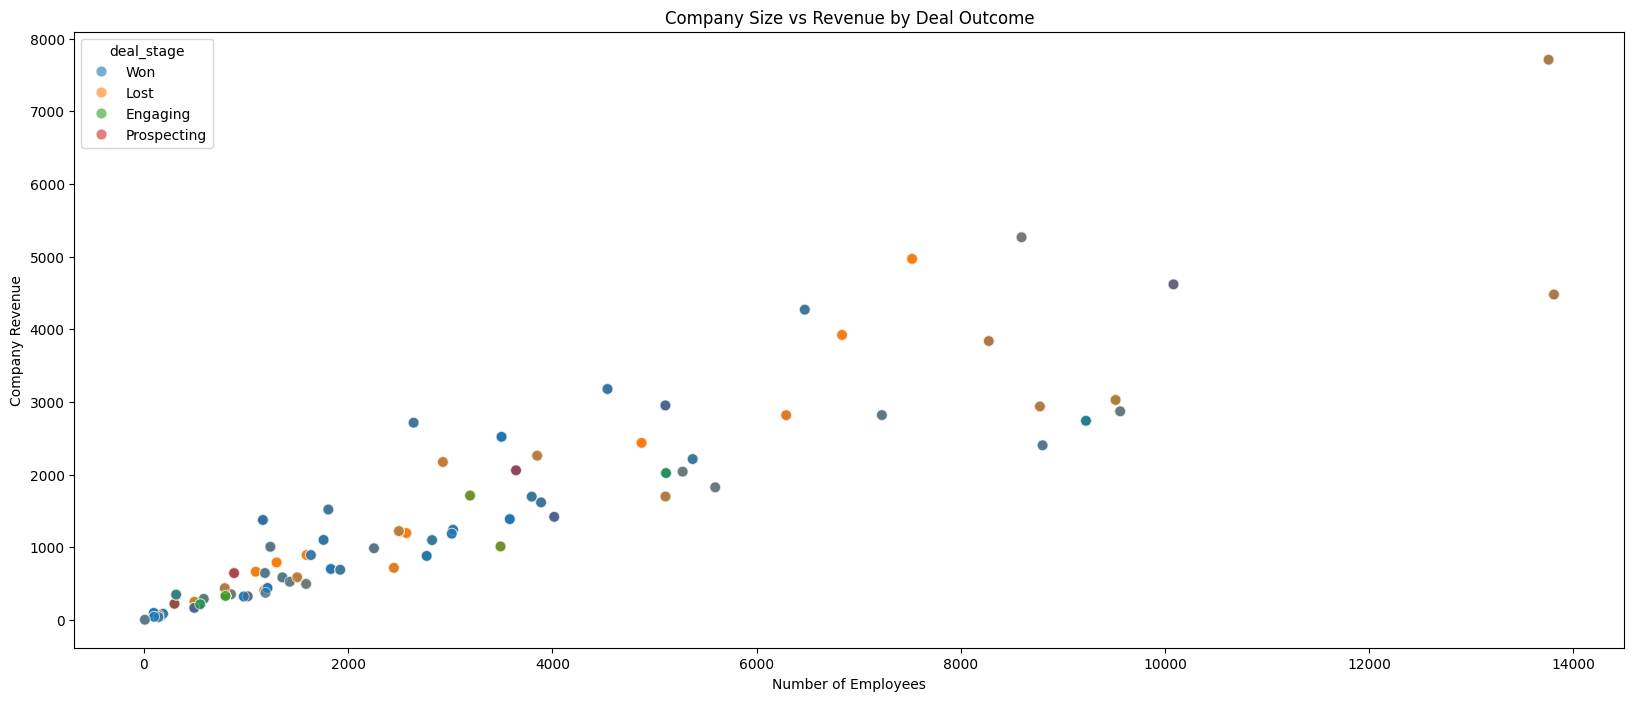

In [92]:
# Filter outliers for better visualization
df_clean = df[(df['employees'] < df['employees'].quantile(0.95)) & 
              (df['revenue'] < df['revenue'].quantile(0.95))].copy()

plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_clean, x='employees', y='revenue', hue='deal_stage', alpha=0.6, s=60)
plt.title('Company Size vs Revenue by Deal Outcome')
plt.xlabel('Number of Employees')
plt.ylabel('Company Revenue')
plt.show()


 ##### Findings:
  - Clear positive correlation between company size and revenue
  - Deal outcomes distributed across all company sizes

  ##### Company Profile Analysis
  - **Size-Revenue correlation**: Validates the data quality and company profiling
  - **Universal opportunity**: Wins occur across all company sizes
  - **No clear pattern**: Deal outcomes not strictly determined by company size
  - **Implication**: Other factors (product fit, timing) may be more important


#### Step 15: Histogram - Deal value distribution

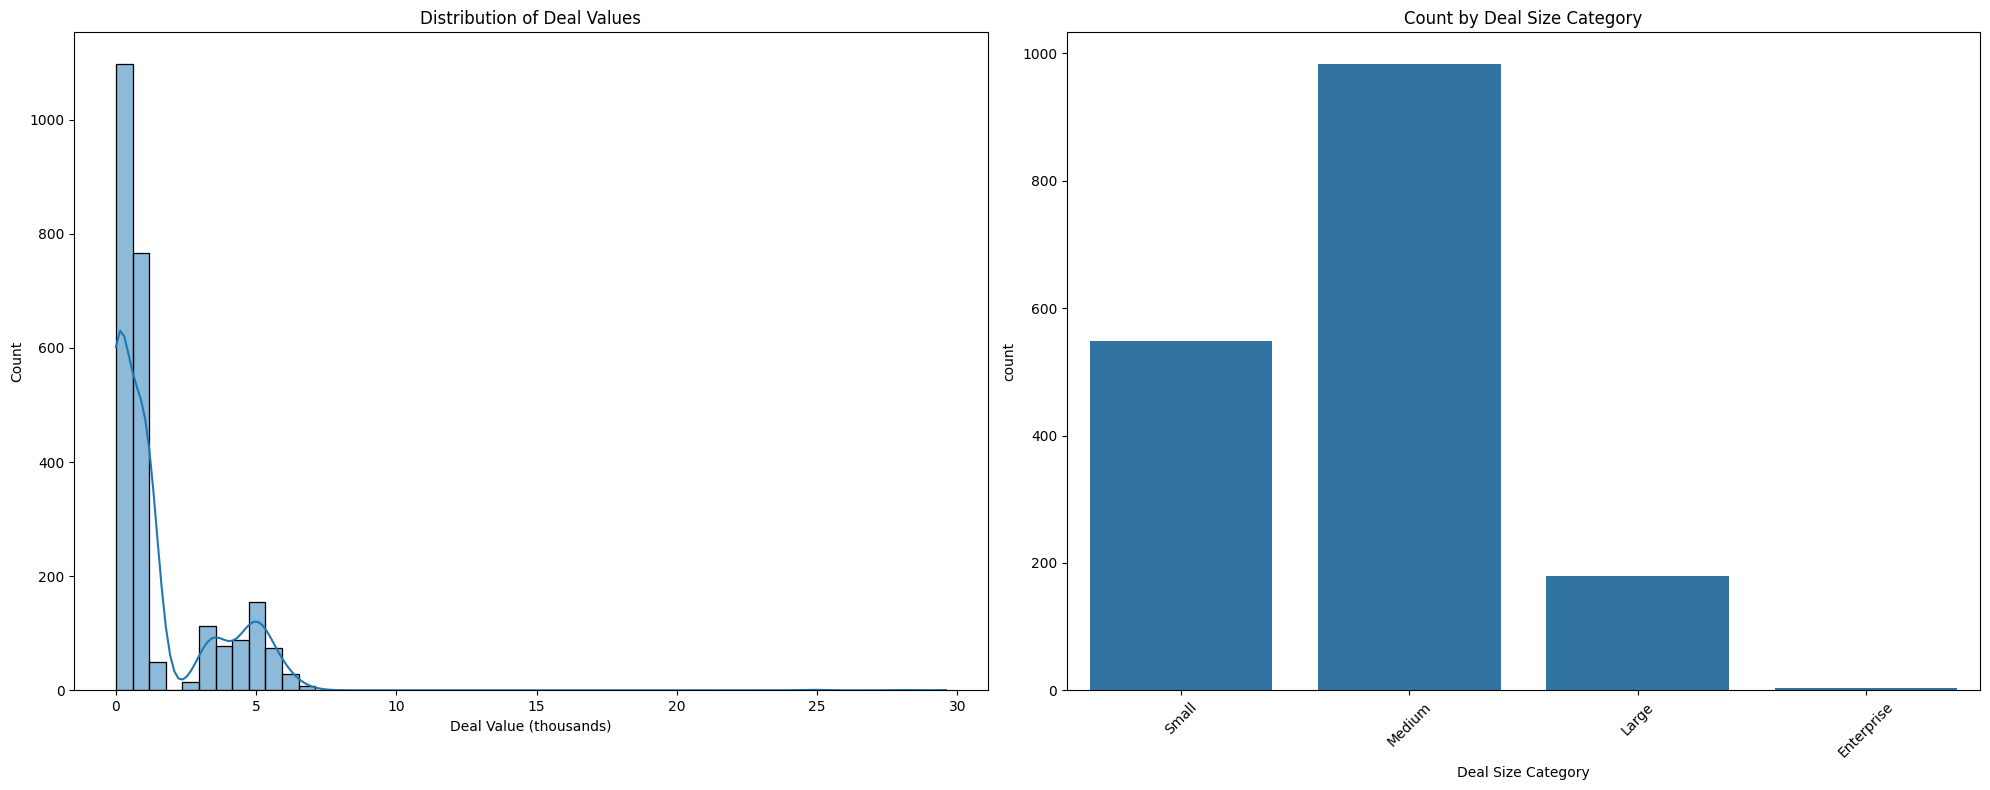

In [93]:
# Create deal size categories
df['deal_size_category'] = pd.cut(df['close_value_k'], 
                                  bins=[0, 1, 5, 15, float('inf')], 
                                  labels=['Small', 'Medium', 'Large', 'Enterprise'])

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['close_value_k'].dropna(), bins=50, kde=True)
plt.title("Distribution of Deal Values")
plt.xlabel('Deal Value (thousands)')

plt.subplot(1, 2, 2) 
sns.countplot(data=df, x='deal_size_category', order=['Small', 'Medium', 'Large', 'Enterprise'])
plt.title("Count by Deal Size Category")
plt.xlabel('Deal Size Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




##### Deal Value Distribution Insights:
- Most deals are in the small to medium range
- Distribution is right-skewed with some high-value outliers
- Enterprise deals are relatively rare but high-value

 ##### Deal Size Segmentation
  - **Pareto principle**: Likely 80% of revenue from 20% of deals
  - **Volume strategy needed**: Small deals dominate count - need efficiency
  - **Enterprise focus**: Dedicate specialized resources to rare but valuable enterprise deals
  - **Pricing strategy**: Considerations needed for tiered approach based on deal size categories



#### Step 16: Box plot - Sales agent performance

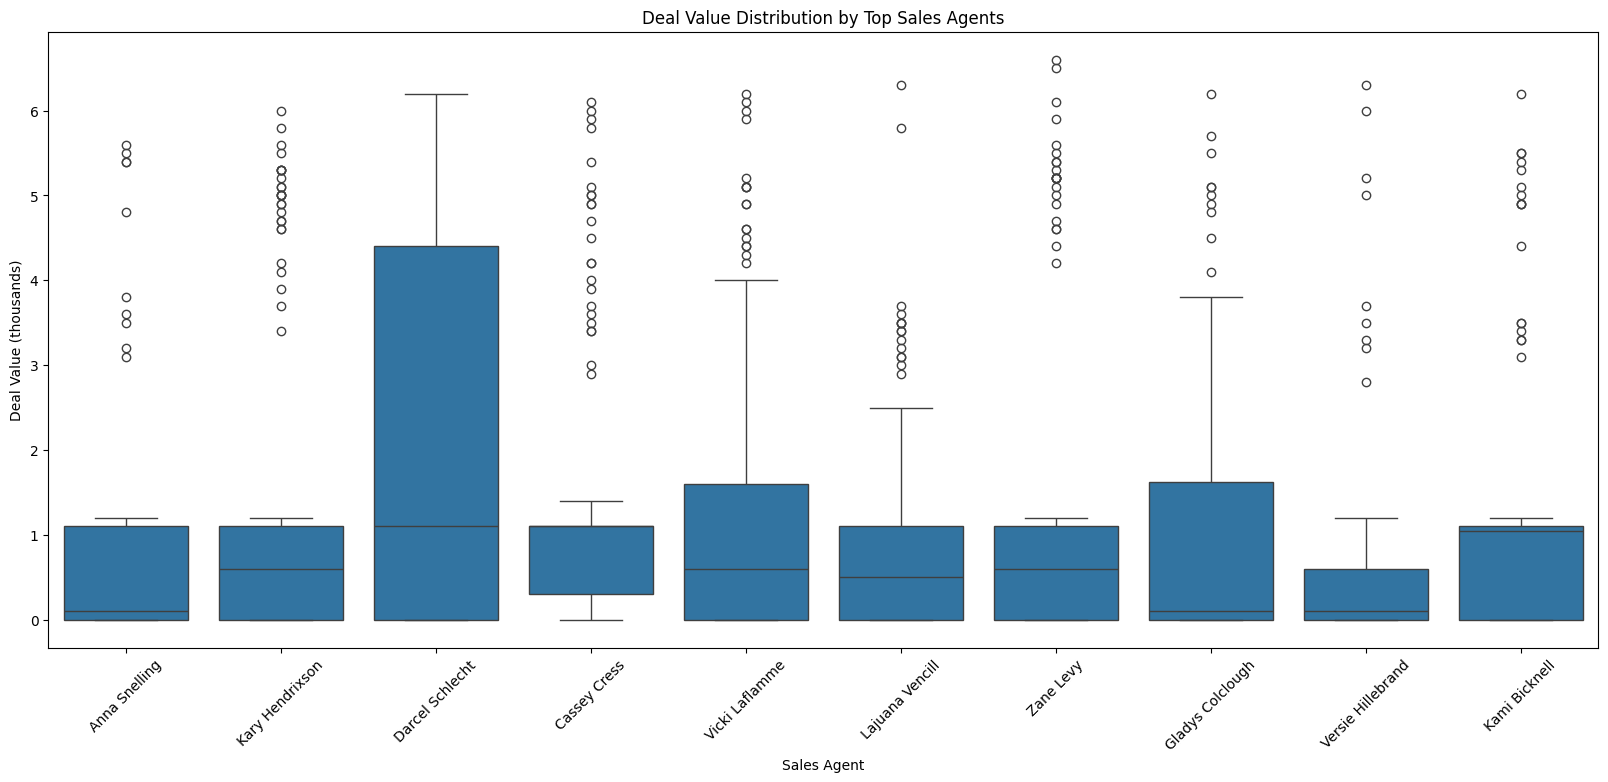

In [94]:
# Analyze top sales agents by deal count
top_agents = df['sales_agent'].value_counts().head(10).index
df_top_agents = df[df['sales_agent'].isin(top_agents)]

plt.figure(figsize=(20, 8))
sns.boxplot(data=df_top_agents, x='sales_agent', y='close_value_k')
plt.title('Deal Value Distribution by Top Sales Agents')
plt.xlabel('Sales Agent')
plt.ylabel('Deal Value (thousands)')
plt.xticks(rotation=45)
plt.show()



##### Sales Agent Performance Insights:
- Different agents show varying deal value distributions
- Some agents consistently close higher-value deals
- Agent performance varies significantly across the team

 ##### Sales Team Performance Analysis
  - **Performance variance**: Wide distribution suggests skill/strategy differences
  - **Top performers**: Identify and replicate strategies of high-value closers
  - **Training opportunity**: Bottom performers need coaching or different territories
  - **Commission structure**: Considerations for value-based incentives vs volume-based


#### Step 17: Regional office analysis

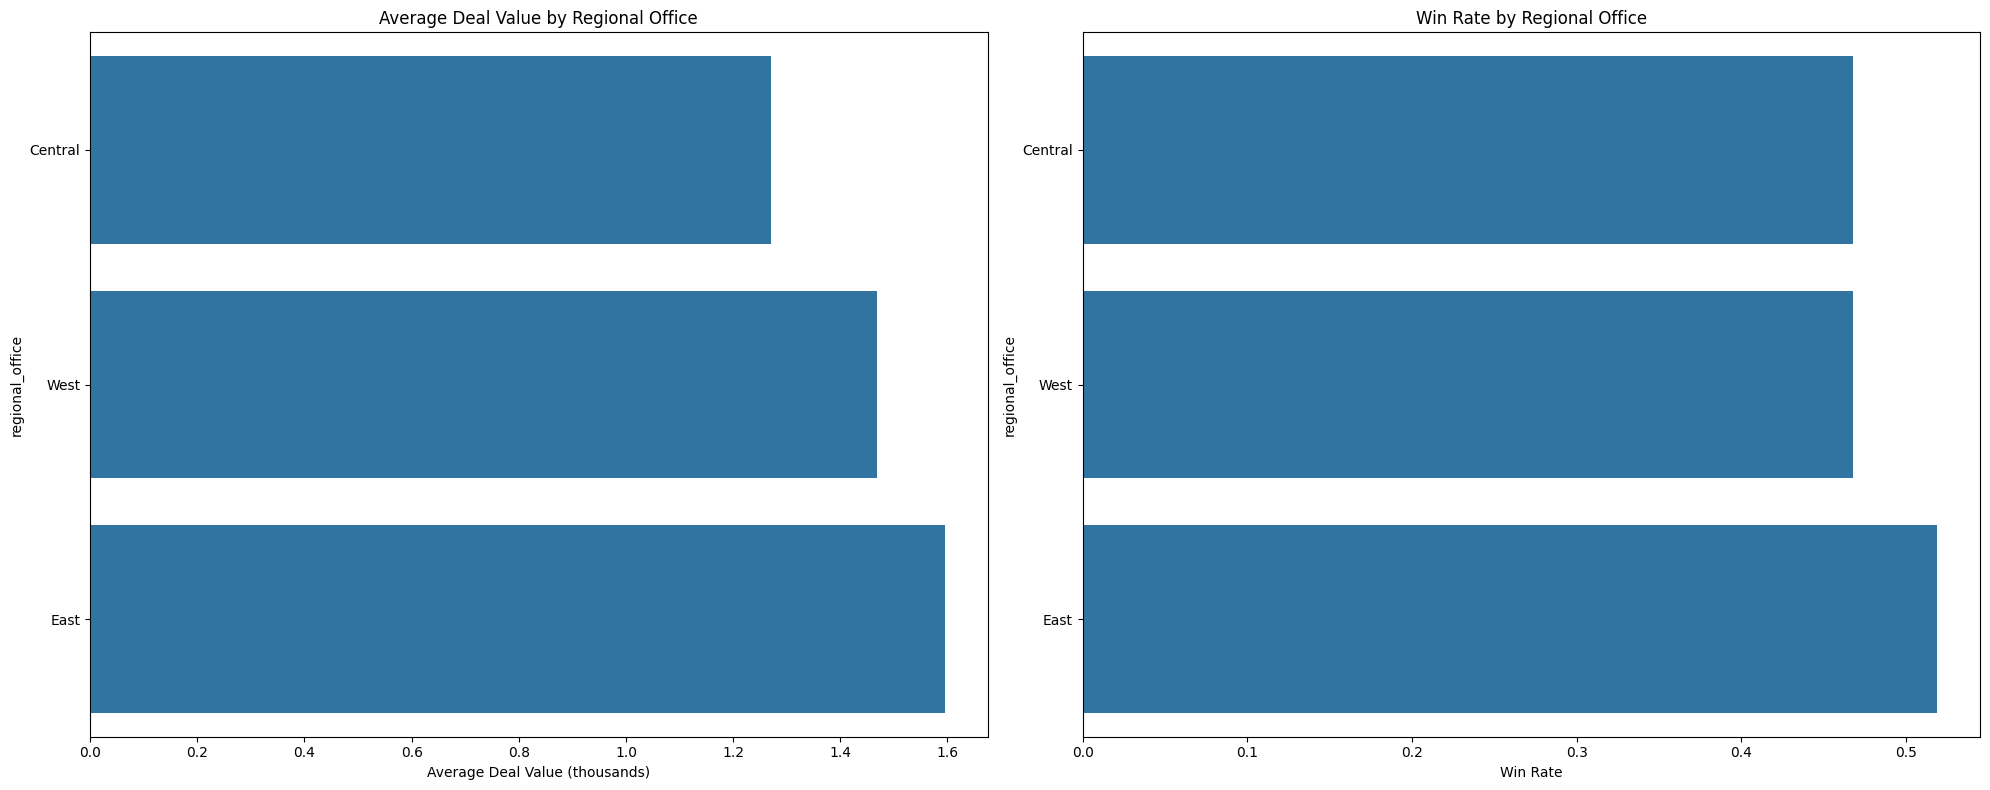

In [95]:
# Regional performance
plt.figure(figsize=(20, 8))

regional_performance = df.groupby('regional_office').agg({
    'close_value_k': ['mean', 'count'],
    'deal_stage': lambda x: (x == 'Won').mean()
}).round(3)

regional_performance.columns = ['avg_deal_value', 'total_deals', 'win_rate']
regional_performance = regional_performance.reset_index().sort_values('avg_deal_value', ascending=True)

plt.subplot(1, 2, 1)
sns.barplot(data=regional_performance, y='regional_office', x='avg_deal_value')
plt.title('Average Deal Value by Regional Office')
plt.xlabel('Average Deal Value (thousands)')

plt.subplot(1, 2, 2)
sns.barplot(data=regional_performance, y='regional_office', x='win_rate')
plt.title('Win Rate by Regional Office')
plt.xlabel('Win Rate')

plt.tight_layout()
plt.show()

##### Findings:
  - Different regions show varying performance levels
  - Win rates differ significantly by region

##### Geographic Performance Insights
  - **Regional disparities**: Significant performance differences require investigation
  - **Best practices**: Study top-performing regions for replicable strategies
  - **Market conditions**: Consider local market factors affecting performance
  - **Resource reallocation**: Shift resources to high-potential regions


#### Step 18: Product series performance analysis

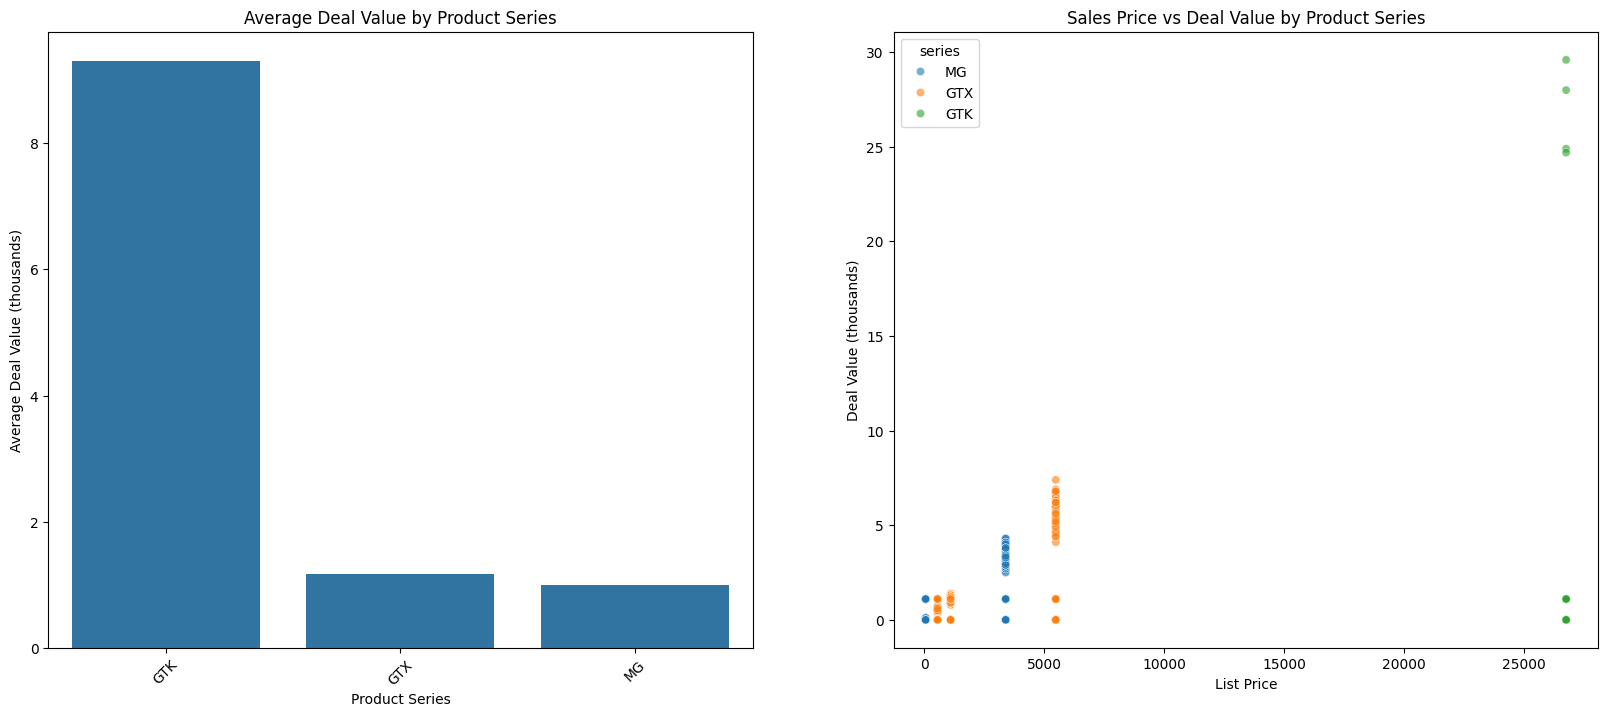

In [96]:
# Product analysis
product_performance = df.groupby('series').agg({
    'close_value_k': 'mean',
    'sales_price': 'mean',
    'opportunity_id': 'count'
}).reset_index().sort_values('close_value_k', ascending=False)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.barplot(data=product_performance, x='series', y='close_value_k')
plt.title('Average Deal Value by Product Series')
plt.xlabel('Product Series')
plt.ylabel('Average Deal Value (thousands)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sales_price', y='close_value_k', hue='series', alpha=0.6)
plt.title('Sales Price vs Deal Value by Product Series')
plt.xlabel('List Price')
plt.ylabel('Deal Value (thousands)')
plt.show()


#### Step 19:  Time series analysis - Sales cycle

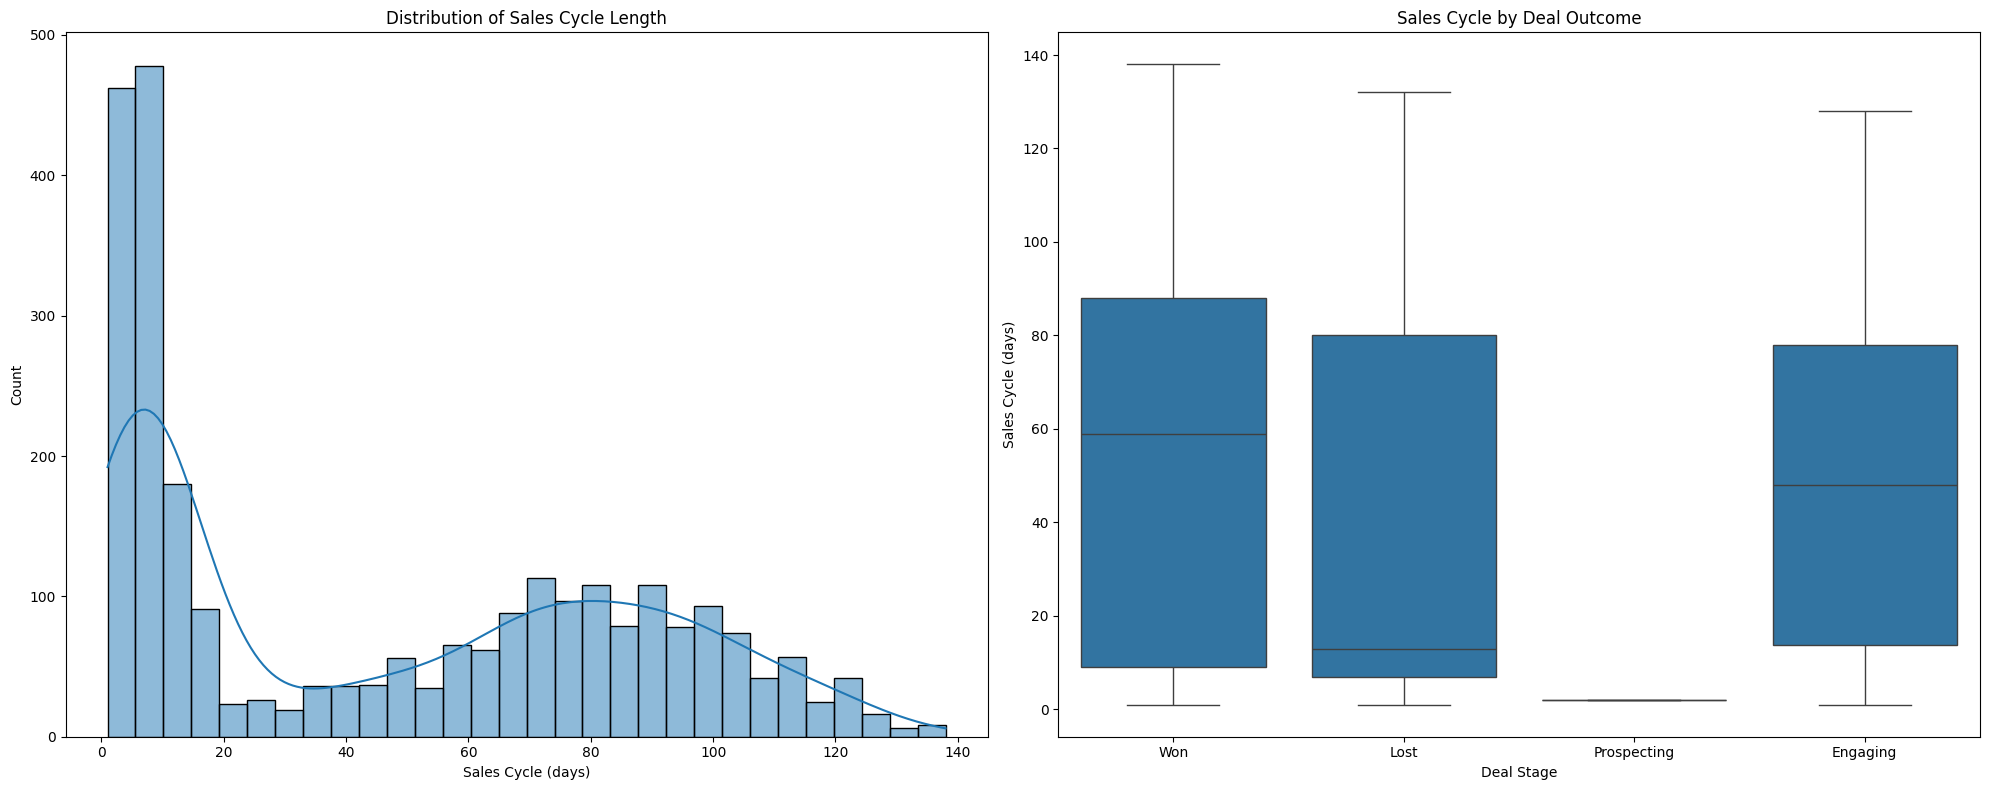

In [97]:
# Calculate sales cycle
df['sales_cycle_days'] = (df['close_date'] - df['engage_date']).dt.days

# Filter reasonable sales cycles
df_cycle = df[(df['sales_cycle_days'] > 0) & (df['sales_cycle_days'] < 365)].copy()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(df_cycle['sales_cycle_days'], bins=30, kde=True)
plt.title('Distribution of Sales Cycle Length')
plt.xlabel('Sales Cycle (days)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cycle, x='deal_stage', y='sales_cycle_days')
plt.title('Sales Cycle by Deal Outcome')
plt.xlabel('Deal Stage')
plt.ylabel('Sales Cycle (days)')

plt.tight_layout()
plt.show()


#### Step 20: Geographic analysis

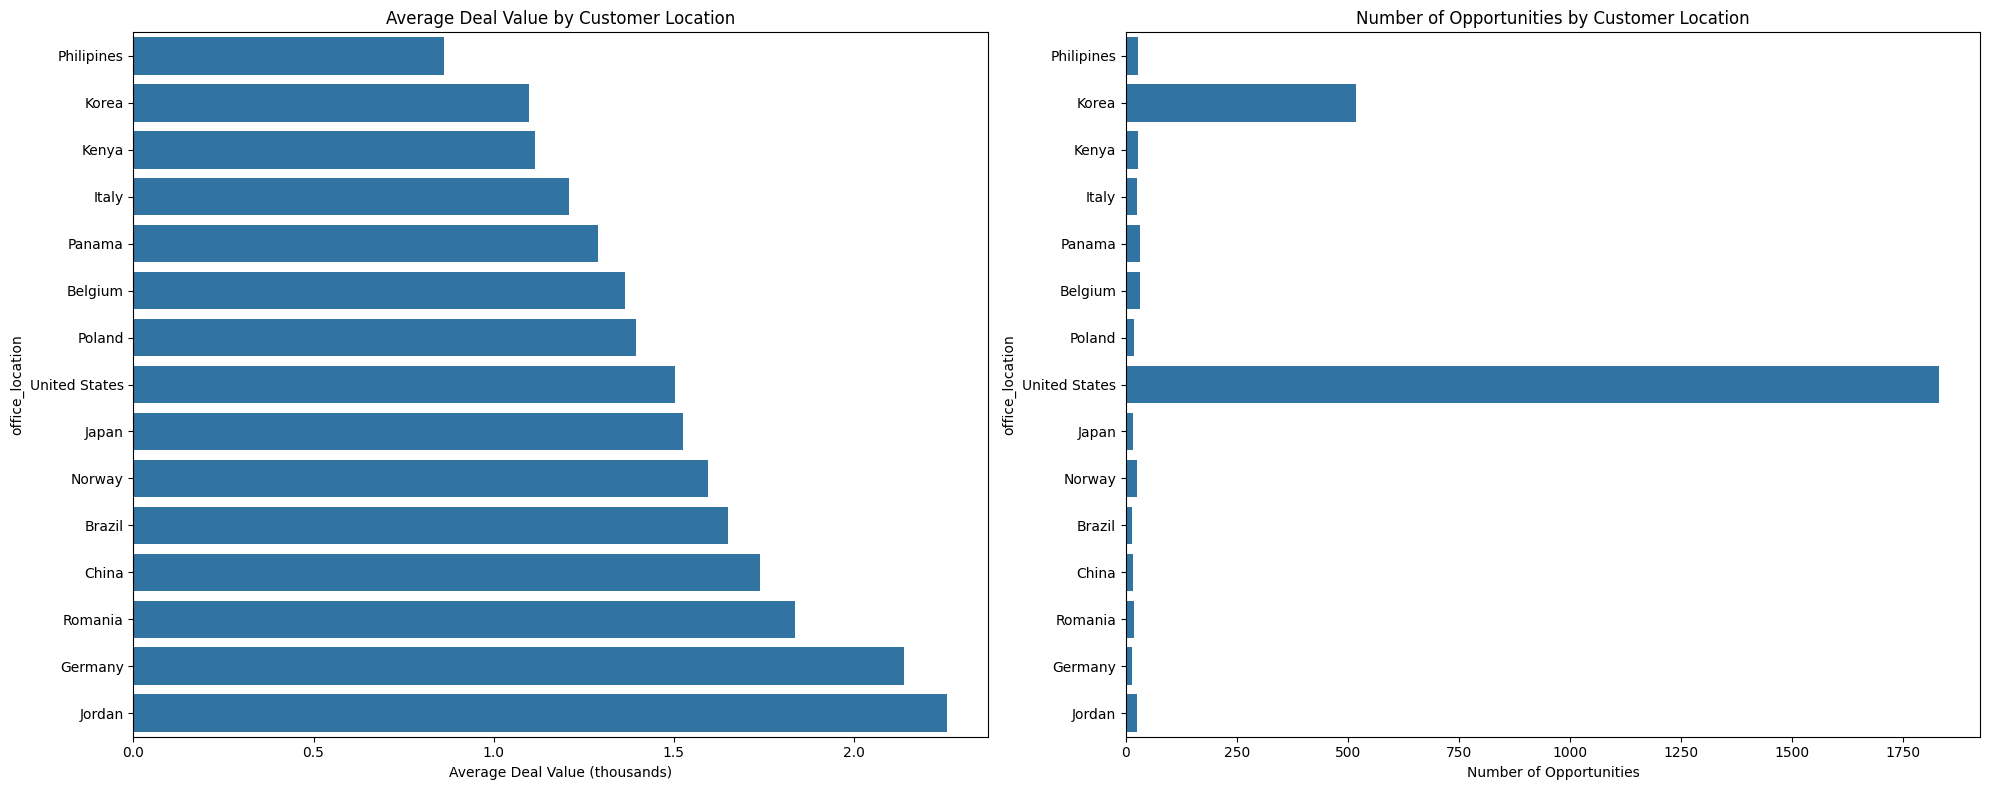

In [98]:
# Office location analysis
plt.figure(figsize=(20, 8))

location_performance = df.groupby('office_location').agg({
    'close_value_k': 'mean',
    'opportunity_id': 'count'
}).reset_index().sort_values('close_value_k', ascending=True)

plt.subplot(1, 2, 1)
sns.barplot(data=location_performance, y='office_location', x='close_value_k')
plt.title('Average Deal Value by Customer Location')
plt.xlabel('Average Deal Value (thousands)')

plt.subplot(1, 2, 2)
sns.barplot(data=location_performance, y='office_location', x='opportunity_id')
plt.title('Number of Opportunities by Customer Location')
plt.xlabel('Number of Opportunities')

plt.tight_layout()
plt.show()

#### Step 21: Correlation heatmap

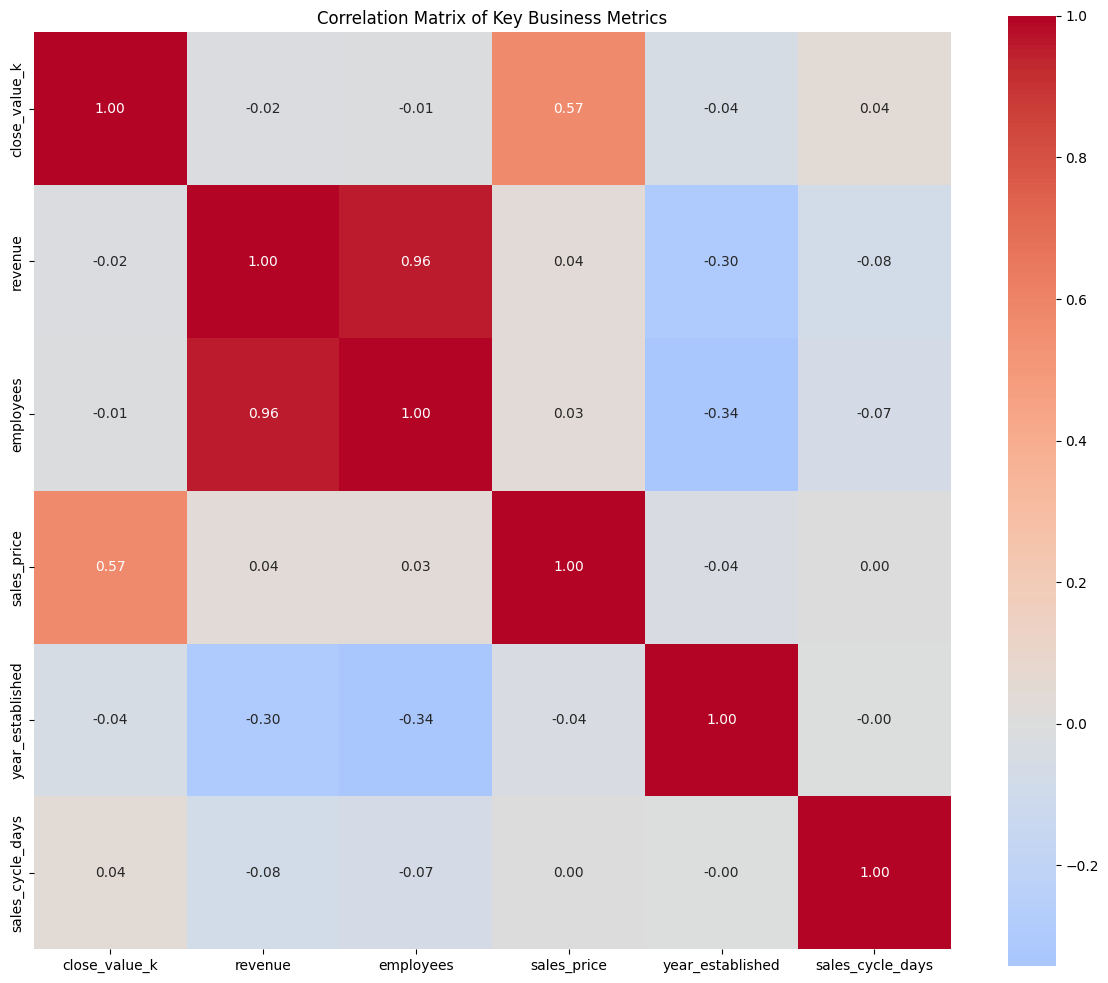

In [99]:
# Select key numerical features for correlation matrix
key_numerical_features = ['close_value_k', 'revenue', 'employees', 'sales_price', 
                         'year_established', 'sales_cycle_days']

correlation_matrix = df[key_numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Key Business Metrics')
plt.tight_layout()
plt.show()

##### Findings:
  - Strong correlation between company metrics (revenue, employees)
  - Sales price strongly correlates with deal value
  - Sales cycle shows weak correlations

##### Correlation Matrix Insights
  - **Multicollinearity**: Revenue and employees highly correlated 
  - **Independent cycle**: Sales cycle length independent of other factors
  - **Pricing power**: Strong price-value correlation confirms pricing strategy
  - **Predictive features**: Focus on sales_price, revenue/employees for deal value prediction


#### Step 22: Deal value vs company characteristics

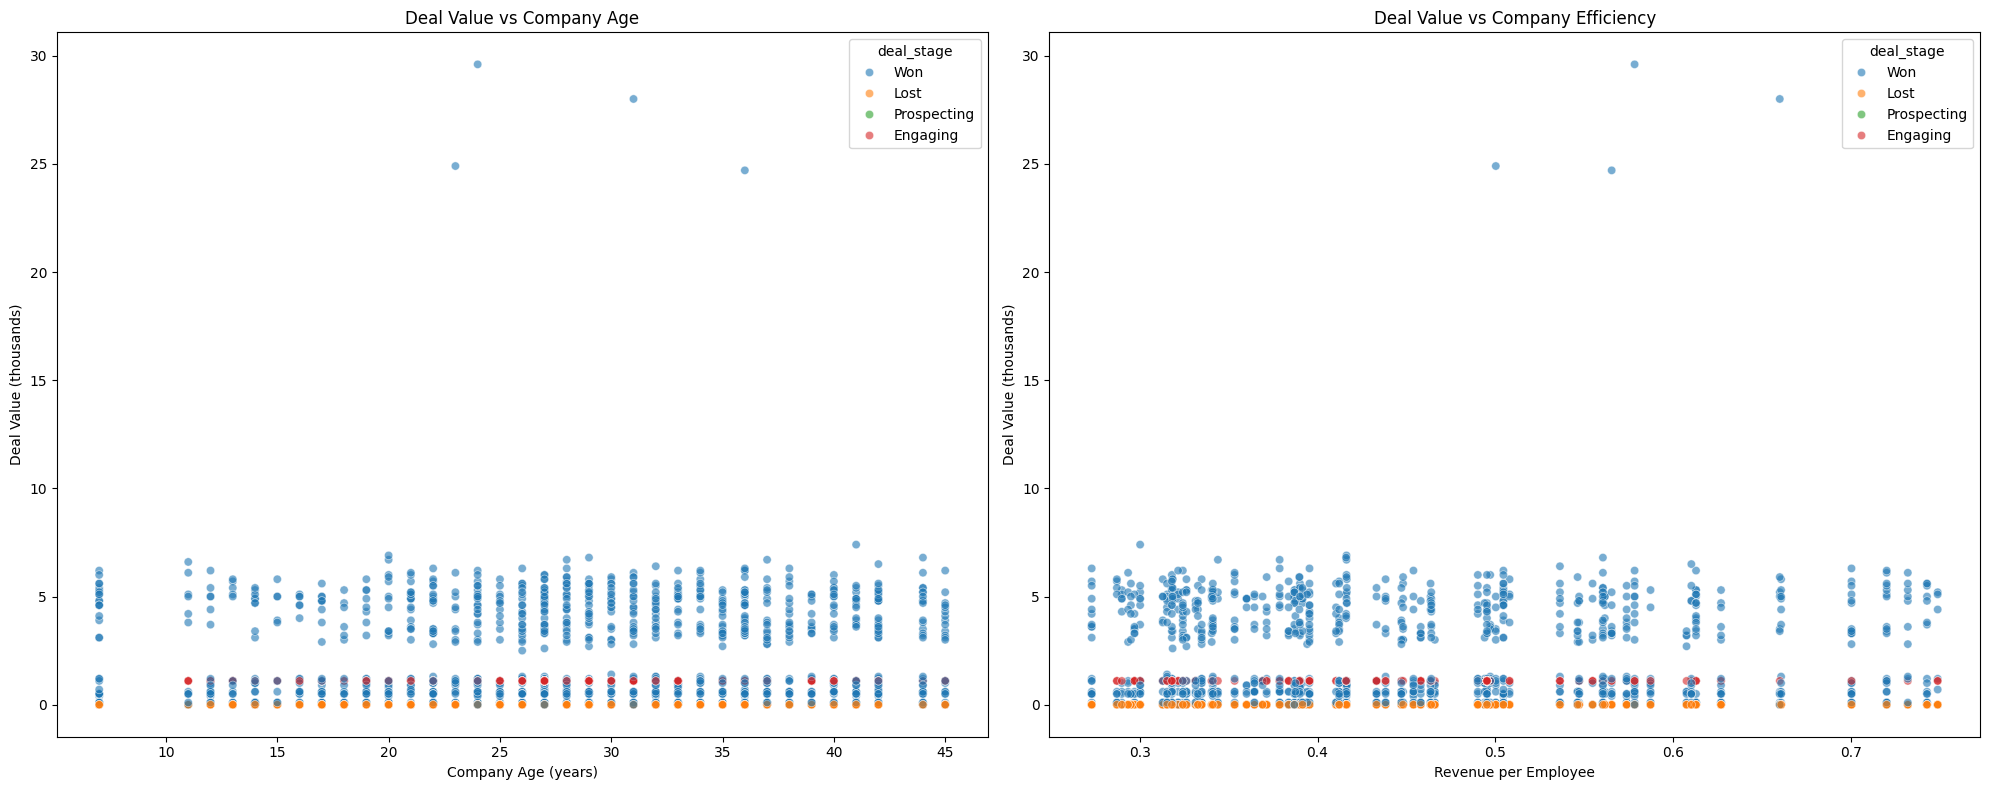

In [100]:
# Company age analysis
df['company_age'] = 2024 - df['year_established']
df_age = df[(df['company_age'] > 0) & (df['company_age'] < 100)].copy()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_age, x='company_age', y='close_value_k', hue='deal_stage', alpha=0.6)
plt.title('Deal Value vs Company Age')
plt.xlabel('Company Age (years)')
plt.ylabel('Deal Value (thousands)')

plt.subplot(1, 2, 2)
# Revenue per employee efficiency
df['revenue_per_employee'] = df['revenue'] / df['employees']
df_efficiency = df[df['revenue_per_employee'] < df['revenue_per_employee'].quantile(0.95)].copy()
sns.scatterplot(data=df_efficiency, x='revenue_per_employee', y='close_value_k', 
                hue='deal_stage', alpha=0.6)
plt.title('Deal Value vs Company Efficiency')
plt.xlabel('Revenue per Employee')
plt.ylabel('Deal Value (thousands)')

plt.tight_layout()
plt.show()

#### Step 23: Win rate analysis by different dimensions

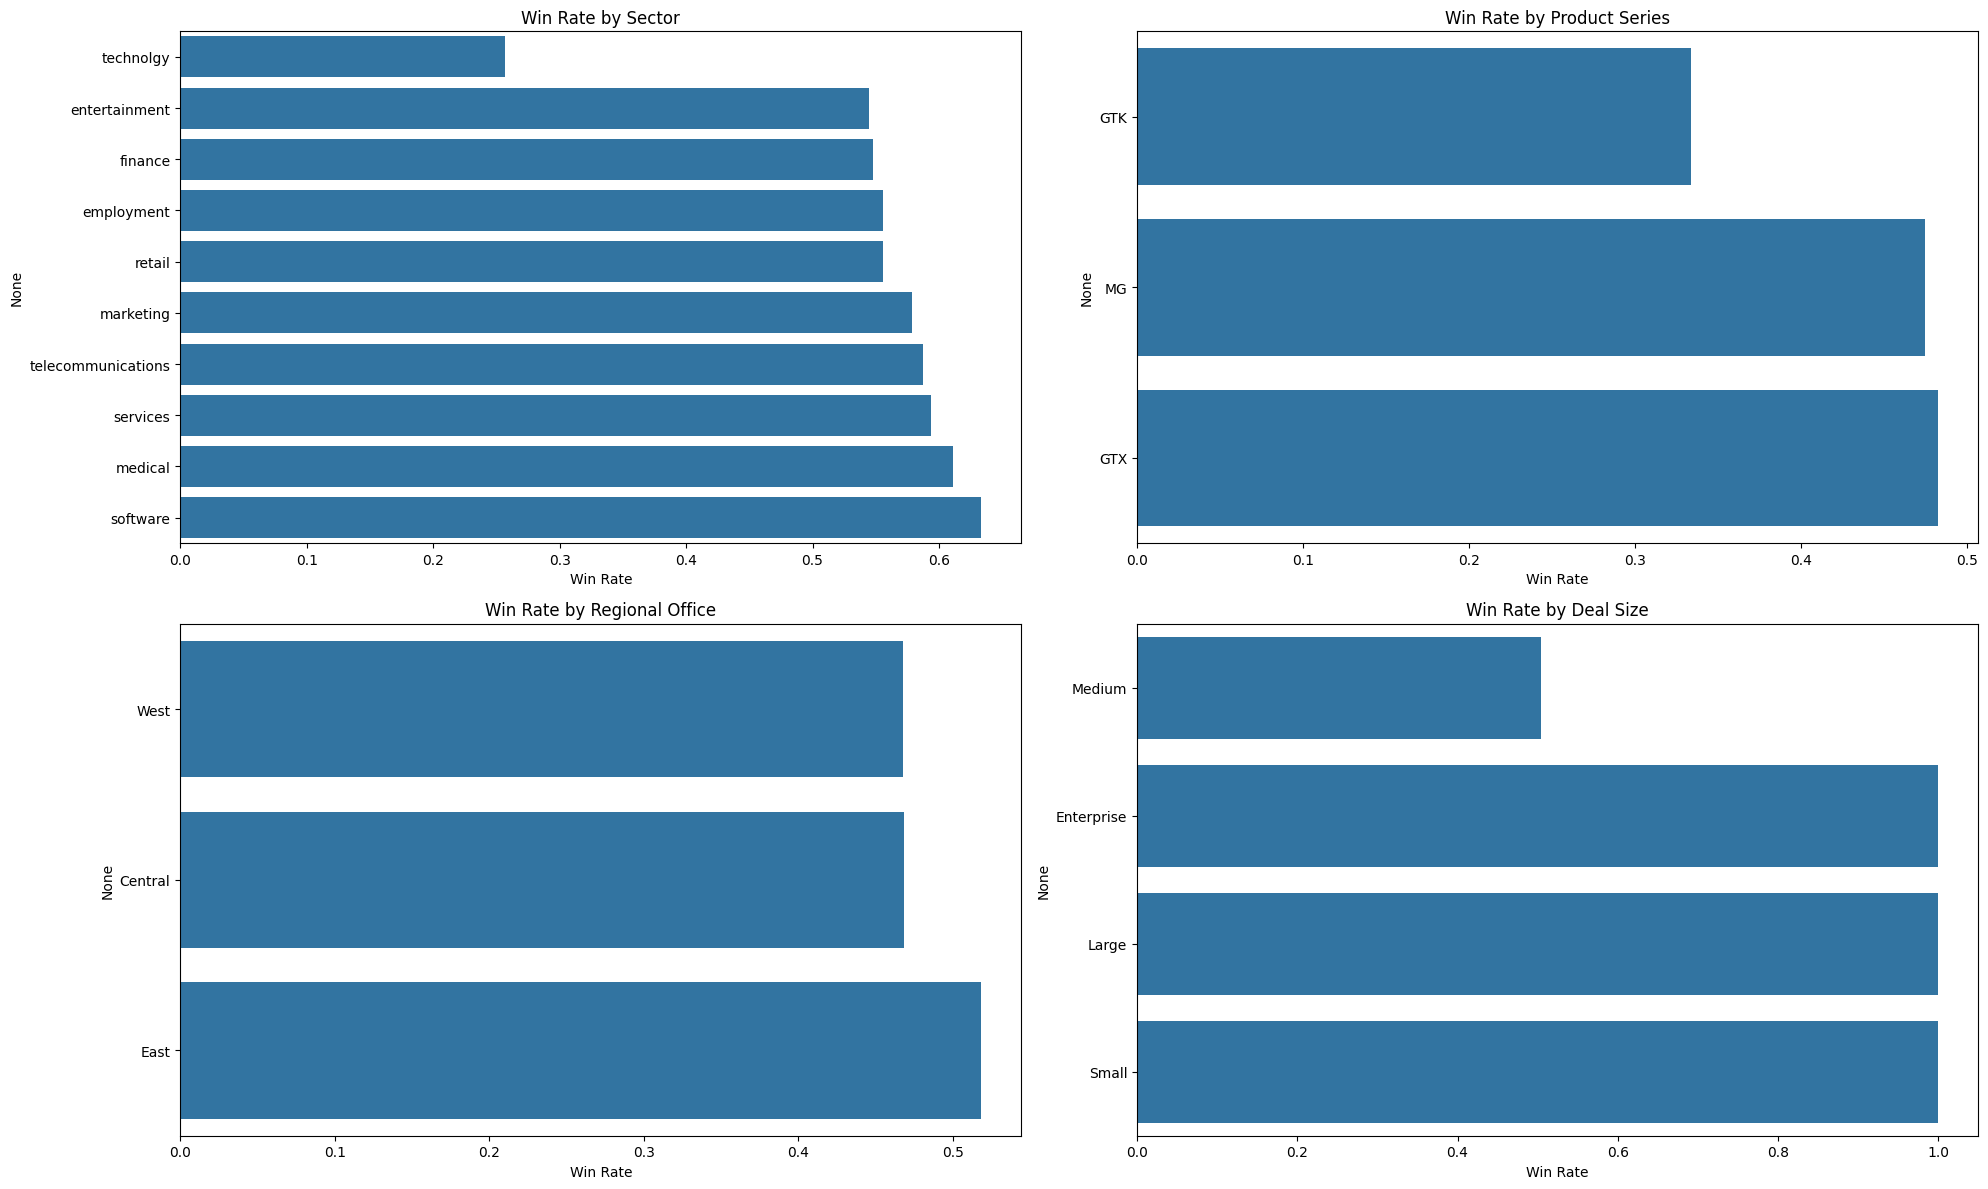

In [101]:
def calculate_win_rate(group):
    return (group == 'Won').mean()

# Win rates by different dimensions
win_rates = pd.DataFrame({
    'Sector': df.groupby('sector')['deal_stage'].apply(calculate_win_rate),
    'Product_Series': df.groupby('series')['deal_stage'].apply(calculate_win_rate),
    'Regional_Office': df.groupby('regional_office')['deal_stage'].apply(calculate_win_rate),
    'Deal_Size': df.groupby('deal_size_category')['deal_stage'].apply(calculate_win_rate)
})

plt.figure(figsize=(20, 12))
for i, (column, data) in enumerate(win_rates.items(), 1):
    plt.subplot(2, 2, i)
    data_clean = data.dropna().sort_values(ascending=True)
    sns.barplot(x=data_clean.values, y=data_clean.index)
    plt.title(f'Win Rate by {column.replace("_", " ")}')
    plt.xlabel('Win Rate')
    
plt.tight_layout()
plt.show()


#### Step 24: Getting unique value in categorical columns

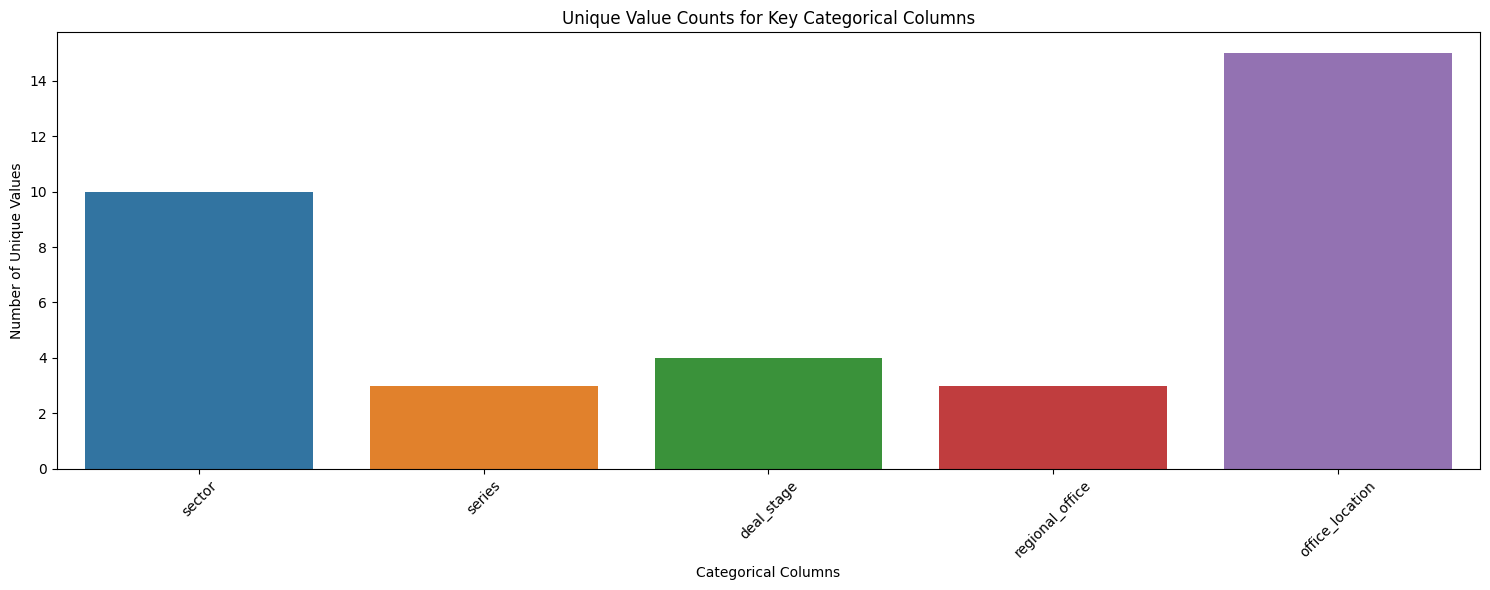

Categorical Column Analysis:
sector: 10 unique values
series: 3 unique values
deal_stage: 4 unique values
regional_office: 3 unique values
office_location: 15 unique values


In [102]:
# Analyze categorical column diversity
categorical_cols_subset = ['sector', 'series', 'deal_stage', 'regional_office', 'office_location']
unique_counts = df[categorical_cols_subset].nunique()

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, hue=unique_counts.index, legend=False)
plt.title('Unique Value Counts for Key Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Categorical Column Analysis:")
for col, count in unique_counts.items():
    print(f"{col}: {count} unique values")

#### Step 25: Summary of insights 

In [103]:
print("\n" + "="*60)
print("KEY BUSINESS INSIGHTS FROM EDA")
print("="*60)

# Calculate key metrics
total_opportunities = len(df)
won_deals = len(df[df['deal_stage'] == 'Won'])
win_rate = won_deals / total_opportunities
avg_deal_value = df['close_value_k'].mean()
avg_sales_cycle = df_cycle['sales_cycle_days'].mean()

print(f"OVERALL PERFORMANCE:")
print(f"- Total Opportunities Analyzed: {total_opportunities:,}")
print(f"- Overall Win Rate: {win_rate:.1%}")
print(f"- Average Deal Value: ${avg_deal_value:.1f}K")
print(f"- Average Sales Cycle: {avg_sales_cycle:.0f} days")




KEY BUSINESS INSIGHTS FROM EDA
OVERALL PERFORMANCE:
- Total Opportunities Analyzed: 2,640
- Overall Win Rate: 48.1%
- Average Deal Value: $1.4K
- Average Sales Cycle: 46 days


Based on the EDA, here are some research that can be explored with supporting evidence from EDA: 

  1. What factors predicts the sucess rate for a deal (Won vs Lost)?

  - Evidence: 48% win rate with variation across segments
  - Approach: A classification model using company size, sector, product, agent
  - Business value: Improve qualification and increase win rate

  2. Are  we  able to predict deal value before engagement?

  - Evidence: Strong correlations with company metrics and product pricing
  - Approach: Regression model using company characteristics
  - Business value: Better resource allocation and forecasting

  3. What drives sales cycle length?

  - Evidence: Sales cycle varies but shows weak correlation with other metrics
  - Approach: Analyze cycle time by deal complexity, sector, agent
  - Business value: Reduce cycle time and improve cash flow

  4. Which customer segments offer highest ROI?

  - Evidence: Sector and company size show different value patterns
  - Approach: Segment analysis combining win rate, deal value, and cycle time
  - Business value: Focus on most profitable segments

  5. How can we optimize sales team performance?

  - Evidence: High variance in agent performance
  - Approach: Identify characteristics of top performers
  - Business value: Improve training and territory assignment

  6. Can we identify "at-risk" deals before they're lost?

  - Evidence: We have engagement dates, close dates, and deal stages
  - Approach: Analyze patterns in lost deals like timing, company characteristics, product mismatches
  - Business value: Early intervention to save declining deals

  7. Can we predict which "Engaging" deals will convert?

  - Evidence: We have deals currently in "Engaging" status with various characteristics
  - Approach: By building probability scores for conversion based on historical patterns
  - Business value: Prioritize high-probability opportunities

  8. Can we identify "whale" opportunities earlier?

  - Evidence: Some deals are 10-20x larger than average (up to 30K vs 1.4K average)
  - Approach: Build early indicators of enterprise deal potential
  - Business value: Allocate senior resources to high-value opportunities

  9. Do subsidiary relationships affect deal outcomes?

  - Evidence: "subsidiary_of" field shows some companies are part of larger organizations
  - Approach: Compare performance of independent vs subsidiary accounts
  - Business value: Adjust approach for corporate vs independent buyers


**EDA COMPLETED**
